In [219]:
#!mv t10k-images.idx3-ubyte t10k-images-idx3-ubyte
#!mv t10k-labels.idx1-ubyte t10k-labels-idx1-ubyte
#!mv train-images.idx3-ubyte train-images-idx3-ubyte
#!mv train-labels.idx1-ubyte train-labels-idx1-ubyte


In [14]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import GPy
%matplotlib inline

mndata = MNIST('.')
tr,trlabs = mndata.load_training()
t,tlabs = mndata.load_testing()

In [183]:
Y = np.array(trlabs)
keep = Y<2
X = np.array(tr)[keep]
Y = np.array(trlabs)[keep][:,None]
#strim
X = X[::20,:]
Y = Y[::20,:]

finalscale = 7

newX = np.zeros([len(X),finalscale**2])
for i,x in enumerate(X):
    temp = x.reshape(28,28)
    newX[i,:] = (temp[::int(28/finalscale),::int(28/finalscale)]).reshape(int(finalscale**2))
X = newX

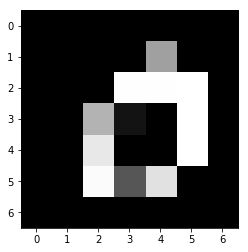

In [185]:
plt.imshow(np.array(X[0,:]).reshape(finalscale,finalscale),cmap='gray')

In [186]:
k = GPy.kern.RBF(finalscale**2,ARD=True)
m = GPy.models.GPClassification(X+0.1*np.random.rand(X.shape[0],X.shape[1]),Y*1.0,k)
#m.rbf.lengthscale = 1000
#m.rbf.variance = 1000.0
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0000   4.366788e+02           nan 
    02s41  0001   4.366787e+02   2.077614e-01 
    04s54  0024   4.341384e+02   8.055651e+01 
    06s60  0047   9.377371e+01   1.349506e+01 

 /home/mike/GPy/GPy/kern/src/stationary.py:158: RuntimeWarning:overflow encountered in true_divide
 /home/mike/GPy/GPy/kern/src/stationary.py:129: RuntimeWarning:overflow encountered in square
 /home/mike/GPy/GPy/kern/src/stationary.py:130: RuntimeWarning:invalid value encountered in add


    06s81  0050   9.377371e+01   1.349506e+01 
Runtime:     06s81
Optimization status: Converged



In [187]:
m

gp_classification.,value,constraints,priors
rbf.variance,1.43629299325,+ve,
rbf.lengthscale,"(49,)",+ve,


In [190]:
testX = np.array(t)
testY = np.array(tlabs)

newtestX = np.zeros([len(testX),finalscale**2])
for i,x in enumerate(testX):
    temp = x.reshape(28,28)
    newtestX[i,:] = (temp[::int(28/finalscale),::int(28/finalscale)]).reshape(int(finalscale**2))
testX = newtestX

keep = testY<2
testX = testX[keep,:]
testY = testY[keep]
pred, var = m.predict(np.array(testX))

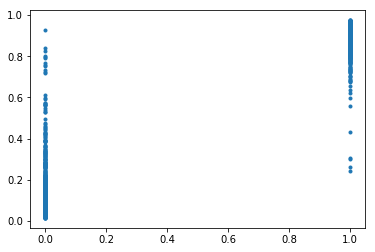

In [191]:
plt.plot(testY,pred,'.')

# Why is this of type int32?

In [218]:
m.predict_quantiles(1.0*np.array(testX[0:1,:]),quantiles=(1.0,99.0))

[array([[1]], dtype=int32), array([[0]], dtype=int32)]

In [202]:
p, _ = m.predict_noiseless(np.array(testX))

In [203]:
q, _ = m.predict(np.array(testX))

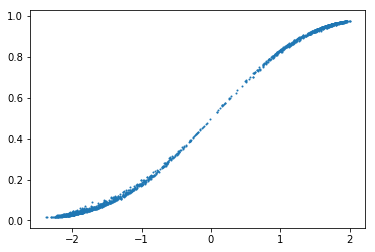

In [205]:
plt.scatter(p,q,1)